In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_gcp = pd.read_csv('data/gcp_trascription.csv')

In [40]:
df_gcp.shape

(87, 11)

In [39]:
df_gcp['Unnamed: 0'].nunique()

87

In [3]:
df_gcp.head()

,Unnamed: 0,trascripcion,time,1,2,3,7,10,28,29,30
0,sources/16-01-2021_21:17:02-806145f6-ebae-43e3...,4 sitios 9 10 11 y 19,2.798251,True,False,False,False,False,False,False,False
1,sources/02-02-2021_07:09:14-d866b2c0-6eca-40e1...,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 6 7,2.229782,True,True,True,True,True,False,False,False
2,sources/14-01-2021_00:30:27-39f1a1db-904a-4069...,34,2.147959,False,False,False,False,False,False,False,False
3,sources/03-01-2021_15:15:25-109d0932-6702-4390...,3 4 5 6 7 8 9 10 11 12 13 14 y 5,2.977011,True,True,True,True,True,False,False,False
4,sources/15-01-2021_00:56:43-7e43bff4-5cec-48e2...,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,3.346922,True,True,True,True,True,False,False,False


In [4]:
df_gcp2 = pd.read_csv('data/gcp_trascription_2.csv')

In [41]:
df_gcp2.shape

(87, 11)

In [42]:
df_gcp2['Unnamed: 0'].nunique()

87

In [5]:
df_gcp2.head()

,Unnamed: 0,trascripcion,time,1,2,3,7,10,28,29,30
0,sources/16-01-2021_21:17:02-806145f6-ebae-43e3...,4 9 10 11 14 16 y 19,1.963668,True,False,False,False,False,False,False,False
1,sources/02-02-2021_07:09:14-d866b2c0-6eca-40e1...,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 6 7,2.303372,True,True,True,True,True,False,False,False
2,sources/14-01-2021_00:30:27-39f1a1db-904a-4069...,3 4 5 6 7 8 9 10,1.967830,False,False,True,True,True,False,False,False
3,sources/03-01-2021_15:15:25-109d0932-6702-4390...,3 4 5 6 7 8 9 10 11 12 13 14 y 5,2.359141,True,True,True,True,True,False,False,False
4,sources/15-01-2021_00:56:43-7e43bff4-5cec-48e2...,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,3.181809,True,True,True,True,True,False,False,False


In [6]:
print(df_gcp[['1', '2', '3', '7', '10', '28', '29', '30']].sum().to_list())
print(df_gcp2[['1', '2', '3', '7', '10', '28', '29', '30']].sum().to_list())

[73, 71, 71, 62, 62, 37, 33, 27]
[74, 72, 76, 72, 72, 37, 34, 27]


In [68]:
df_gcp["Unnamed: 0"].nunique(), df_gcp.shape

(87, (87, 11))

In [7]:
df = (
    df_gcp
    .rename(columns = {
        'Unnamed: 0': 'id'
    }, inplace = False)
)
df['id'] = df['id'].apply(lambda x: x.split('/')[-1][20:])

df3 = (
    df_gcp2
    .rename(columns = {
        'Unnamed: 0': 'id'
    }, inplace = False)
)
df3['id'] = df3['id'].apply(lambda x: x.split('/')[-1][20:])

In [8]:
df_google = df.merge(df3, on='id', suffixes=['_gcp','_gcp2'])

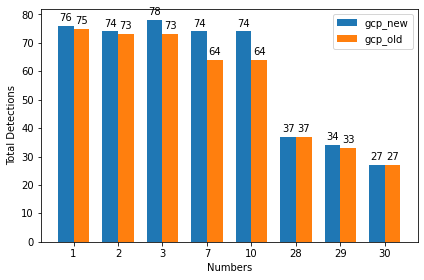

In [9]:
labels = ['1', '2', '3', '7', '10', '28', '29', '30']
data = [
    df_google[['1_gcp2', '2_gcp2', '3_gcp2', '7_gcp2', '10_gcp2', '28_gcp2', '29_gcp2', '30_gcp2']].sum().to_list(),
    df_google[['1_gcp', '2_gcp', '3_gcp', '7_gcp', '10_gcp', '28_gcp', '29_gcp', '30_gcp']].sum().to_list(),
]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data[0], width, label='gcp_new')
rects2 = ax.bar(x + width/2, data[1], width, label='gcp_old')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Detections')
ax.set_xlabel('Numbers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [79]:
df_aws = pd.read_csv('data/aws_transcription.csv')

In [43]:
df_aws.shape

(76, 11)

In [46]:
df_aws['Unnamed: 0'].nunique()

76

In [11]:
df_aws[['1']].sum()

1    56
dtype: int64

In [12]:
df_aws[['7']].sum()

7    66
dtype: int64

In [13]:
df_aws[['10']].sum()

10    60
dtype: int64

In [49]:
df2 = (
    df_aws
    .rename(columns = {'Unnamed: 0': 'id'}, inplace = False)
)

In [59]:
df2.shape

(76, 11)

In [51]:
gcp_ids = df['id'].to_list()
gcp2_ids = df3['id'].to_list()
aws_ids = df2['id'].to_list()

In [52]:
aws_ids[0]

'bd4b7f28-dacb-4cd7-87a3-fb4ea7779cad'

In [78]:
gcp_ids[0]

'806145f6-ebae-43e3-848f-3d6b26d803bd'

In [54]:
matched_id = [i for i in gcp_ids if i in aws_ids]

In [55]:
len(matched_id)

77

In [77]:
df3.loc[df3.duplicated(subset=["id"], keep=False)]

,id,trascripcion,time,1,2,3,7,10,28,29,30
3,109d0932-6702-4390-9e4c-d01177e1fb5c,3 4 5 6 7 8 9 10 11 12 13 14 y 5,2.359141,True,True,True,True,True,False,False,False
57,109d0932-6702-4390-9e4c-d01177e1fb5c,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 y 17 promo...,3.665681,True,True,True,True,True,False,False,False


In [76]:
df2.loc[df2.id == "109d0932-6702-4390-9e4c-d01177e1fb5c"]

,id,transcription,time,1,2,3,7,10,28,29,30
61,109d0932-6702-4390-9e4c-d01177e1fb5c,co- desprecio a,30.0,False,False,False,False,False,False,False,False


In [65]:
df.id.nunique(), df.shape

(86, (87, 11))

In [66]:
df2.id.nunique(), df2.shape

(76, (76, 11))

In [69]:
df_clouds = df.merge(df2, on='id', suffixes=['_gcp','_aws'], how='inner').rename(columns = {'trascripcion': 'transcripcion_gcp', 'transcription': 'transcripcion_aws'}, inplace = False)

In [70]:
df_clouds.shape

(77, 21)

In [71]:
df_clouds['id'].nunique()

76

In [37]:
df3.shape

(87, 11)

In [36]:
df3['id'].nunique()

86

In [28]:
df_clouds2 = df_clouds.merge(df3, on='id', how='inner').rename(columns = {
    'id': 'id_gcp2',
    '1': '1_gcp2',
    '2': '2_gcp2',
    '3': '3_gcp2',
    '7': '7_gcp2',
    '10': '10_gcp2',
    '28': '28_gcp2',
    '29': '29_gcp2',
    '30': '30_gcp2',
    'time': 'time_gcp2',
    'trascripcion': 'transcripcion_gcp2'}, inplace = False)

In [29]:
df_clouds2.shape

(82, 31)

In [30]:
df_clouds[['1_gcp', '1_aws']].sum()

1_gcp    66
1_aws    57
dtype: object

In [54]:
df_clouds2[['1_gcp', '1_aws']].sum()

1_gcp    77
1_aws    59
dtype: int64

In [25]:
df_clouds[['2_gcp', '2_aws']].sum()

2_gcp    71
2_aws    43
dtype: int64

In [26]:
df_clouds[['3_gcp', '3_aws']].sum()

3_gcp    71
3_aws    59
dtype: int64

In [27]:
df_clouds[['7_gcp', '7_aws']].sum()

7_gcp    63
7_aws    67
dtype: int64

In [28]:
df_clouds[['10_gcp', '10_aws']].sum()

10_gcp    63
10_aws    61
dtype: int64

In [29]:
df_clouds[['28_gcp', '28_aws']].sum()

28_gcp    35
28_aws    44
dtype: int64

In [30]:
df_clouds[['29_gcp', '29_aws']].sum()

29_gcp    32
29_aws    40
dtype: int64

In [31]:
df_clouds[['30_gcp', '30_aws']].sum()

30_gcp    29
30_aws    53
dtype: int64

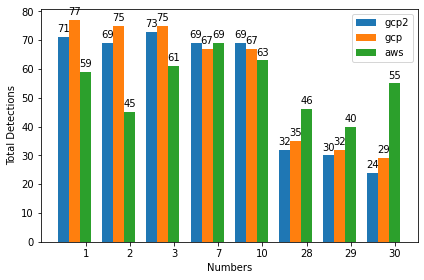

In [50]:
labels = ['1', '2', '3', '7', '10', '28', '29', '30']
data = [
    df_clouds2[['1_gcp2', '2_gcp2', '3_gcp2', '7_gcp2', '10_gcp2', '28_gcp2', '29_gcp2', '30_gcp2']].sum().to_list(),
    df_clouds2[['1_gcp', '2_gcp', '3_gcp', '7_gcp', '10_gcp', '28_gcp', '29_gcp', '30_gcp']].sum().to_list(),
    df_clouds2[['1_aws', '2_aws', '3_aws', '7_aws', '10_aws', '28_aws', '29_aws', '30_aws']].sum().to_list()
]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, data[0], width, label='gcp2')
rects2 = ax.bar(x - width, data[1], width, label='gcp')
rects3 = ax.bar(x, data[2], width, label='aws')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('cTotal Detections')
ax.set_xlabel('Numbers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [56]:
dfs = [df, df2, df3]

In [60]:
from functools import reduce

df_final = reduce(lambda left,right: pd.merge(left,right,on='id', suffixes=['_gcp','_aws']), dfs)

In [63]:
df_final = df_final.rename(columns = {
    'id': 'id_gcp2',
    '1': '1_gcp2',
    '2': '2_gcp2',
    '3': '3_gcp2',
    '7': '7_gcp2',
    '10': '10_gcp2',
    '28': '28_gcp2',
    '29': '29_gcp2',
    '30': '30_gcp2',
    'time': 'time_gcp2',
    'trascripcion': 'transcripcion_gcp2'}, inplace = False)

In [65]:
df_final[['1_gcp', '1_aws', '1_gcp2']].sum()

1_gcp     77
1_aws     59
1_gcp2    71
dtype: object